# Projeto DATASUS - Versão Atualizada

## Motivação

### O Ministério da Saúde, por meio do DATASUS, disponibiliza informações que podem servir para subsidiar análises objetivas da situação sanitária, tomadas de decisão baseadas em evidências e elaboração de programas de ações de saúde.
### Os acontecimentos dos últimos dois anos chamou a atenção de muitos para a mortalidade, especialmente a pandemia relacionada ao COVID-19, que ceifou a vida de milhões de pessoas no mundo.
### Nesse contexto, apresentarei neste projeto gráficos com a evolução das causas de óbitos no Brasil, classificadas por Capítulos (CID-10), ocorridos durante o período de 2015 até 2020. Depois irei comparar os totais de óbitos com os de nascimentos no mesmo período. Também farei leituras dos gráficos gerados.
### Para obter os dados de óbitos segui o critério de pesquisa abaixo, salvando-os em um único arquivo (.csv), onde as linhas correspondem ao ano e as colunas ao CID-10:
#### ==> Estatísticas Vitais > Mortalidade - desde 1996 pela CID-10 > Mortalidade Geral > Brasil por Região e Unidade da Federação > Linha (Capítulo-CID-10) / Coluna (Ano do óbito) / Conteúdo (Óbitos p/ocorrênc) / Período (2015 a 2019)
#### ==> Estatísticas Vitais > Dados Preliminares de 2020 > Mortalidade Geral > Brasil por Região e Unidade da Federação > Linha (Capítulo-CID-10) / Coluna (Ano do óbito) / Conteúdo (Óbitos p/ocorrênc) / Período (2020)
#### https://datasus.saude.gov.br/informacoes-de-saude-tabnet
#### CID-10: Classificação Internacional de Doenças e Problemas Relacionados à Saúde, 10ª revisão.

## Primeira Carga e Manipulação de Dados - Óbitos de 2015 a 2020

In [1]:
# importando bibliotecas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Arquivo contendo quantidades de óbitos por ano e tipos de causas, seguindo classificação da CID-10
obitos = pd.read_csv('Obitos-Capitulo-CID10-2015-2020.csv', sep = ';', index_col=0)
obitos

,Cap I,Cap II,Cap III,Cap IV,Cap V,Cap VI,Cap VII,Cap VIII,Cap IX,Cap X,Cap XI,Cap XII,Cap XIII,Cap XIV,Cap XV,Cap XVI,Cap XVII,Cap XVIII,Cap XX,Total
Ano do Óbito,,,,,,,,,,,,,,,,,,,,
2015,55022,209780,6506,76235,12558,34721,21,147,349642,149541,64202,4970,5385,36549,1896,22162,10989,71713,152136,1264175
2016,57188,215217,6878,78075,12674,36870,20,173,362091,158041,66044,5874,5787,39367,1814,21049,10882,75869,155861,1309774
2017,54874,221821,6622,79662,12858,38786,19,179,358882,155620,66052,6100,5912,40470,1874,21458,10995,71822,158657,1312663
2018,54679,227920,6601,81365,13697,41035,21,169,357770,155191,67316,6273,6153,43428,1862,20764,11156,70505,150814,1316719
2019,56666,235301,7068,83485,14526,45235,23,206,364132,162005,68770,7152,6506,47566,1726,20354,11308,74972,142800,1349801
2020,264666,227519,6622,91055,17188,44881,25,158,354093,150374,66131,6815,6060,44994,1989,18815,9536,97436,144382,1552739


In [3]:
# Arquivo contendo ocorrências de óbitos por CID-10, carregado com o objetivo de se obter
# as descrições dos capítulos
obito2020 = pd.read_csv('Obitos-Capitulo-CID10-2020.csv', sep = ';')
obito2020

,Capítulo CID-10,Óbitos p/Ocorrênc
0,I. Algumas doenças infecciosas e parasitárias,264666
1,II. Neoplasias (tumores),227519
2,III. Doenças sangue órgãos hemat e transt imun...,6622
3,IV. Doenças endócrinas nutricionais e metaból...,91055
4,V. Transtornos mentais e comportamentais,17188
5,VI. Doenças do sistema nervoso,44881
6,VII. Doenças do olho e anexos,25
7,VIII.Doenças do ouvido e da apófise mastóide,158
8,IX. Doenças do aparelho circulatório,354093
9,X. Doenças do aparelho respiratório,150374


In [4]:
# Gerando dicionário com descrições dos Capítulos, a partir do DataFrame obito2020
capitulos={}
for linha in obito2020['Capítulo CID-10']:
    pos = linha.find('.')
    chave=linha[0:pos]
    valor=linha[pos+1:]
    capitulos[chave] = valor.lstrip()
capitulos['Total'] = 'Nacional'
capitulos

{'I': 'Algumas doenças infecciosas e parasitárias',
 'II': 'Neoplasias (tumores)',
 'III': 'Doenças sangue órgãos hemat e transt imunitár',
 'IV': 'Doenças endócrinas nutricionais e metabólicas',
 'V': 'Transtornos mentais e comportamentais',
 'VI': 'Doenças do sistema nervoso',
 'VII': 'Doenças do olho e anexos',
 'VIII': 'Doenças do ouvido e da apófise mastóide',
 'IX': 'Doenças do aparelho circulatório',
 'X': 'Doenças do aparelho respiratório',
 'XI': 'Doenças do aparelho digestivo',
 'XII': 'Doenças da pele e do tecido subcutâneo',
 'XIII': 'Doenças sist osteomuscular e tec conjuntivo',
 'XIV': 'Doenças do aparelho geniturinário',
 'XV': 'Gravidez parto e puerpério',
 'XVI': 'Algumas afec originadas no período perinatal',
 'XVII': 'Malf cong deformid e anomalias cromossômicas',
 'XVIII': 'Sint sinais e achad anorm ex clín e laborat',
 'XX': 'Causas externas de morbidade e mortalidade',
 'Total': 'Nacional'}

In [5]:
alterar_cap = dict(zip(obitos.columns, capitulos.keys()))
alterar_cap

{'Cap I': 'I',
 'Cap II': 'II',
 'Cap III': 'III',
 'Cap IV': 'IV',
 'Cap V': 'V',
 'Cap VI': 'VI',
 'Cap VII': 'VII',
 'Cap VIII': 'VIII',
 'Cap IX': 'IX',
 'Cap X': 'X',
 'Cap XI': 'XI',
 'Cap XII': 'XII',
 'Cap XIII': 'XIII',
 'Cap XIV': 'XIV',
 'Cap XV': 'XV',
 'Cap XVI': 'XVI',
 'Cap XVII': 'XVII',
 'Cap XVIII': 'XVIII',
 'Cap XX': 'XX',
 'Total': 'Total'}

In [6]:
# Renomeando os nomes dos capítulos originais, simplificando-os
obitos = obitos.rename(columns=alterar_cap)
obitos

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XX,Total
Ano do Óbito,,,,,,,,,,,,,,,,,,,,
2015,55022,209780,6506,76235,12558,34721,21,147,349642,149541,64202,4970,5385,36549,1896,22162,10989,71713,152136,1264175
2016,57188,215217,6878,78075,12674,36870,20,173,362091,158041,66044,5874,5787,39367,1814,21049,10882,75869,155861,1309774
2017,54874,221821,6622,79662,12858,38786,19,179,358882,155620,66052,6100,5912,40470,1874,21458,10995,71822,158657,1312663
2018,54679,227920,6601,81365,13697,41035,21,169,357770,155191,67316,6273,6153,43428,1862,20764,11156,70505,150814,1316719
2019,56666,235301,7068,83485,14526,45235,23,206,364132,162005,68770,7152,6506,47566,1726,20354,11308,74972,142800,1349801
2020,264666,227519,6622,91055,17188,44881,25,158,354093,150374,66131,6815,6060,44994,1989,18815,9536,97436,144382,1552739


In [7]:
# Transposição
obitos = obitos.T
obitos

Ano do Óbito,2015,2016,2017,2018,2019,2020
I,55022,57188,54874,54679,56666,264666
II,209780,215217,221821,227920,235301,227519
III,6506,6878,6622,6601,7068,6622
IV,76235,78075,79662,81365,83485,91055
V,12558,12674,12858,13697,14526,17188
VI,34721,36870,38786,41035,45235,44881
VII,21,20,19,21,23,25
VIII,147,173,179,169,206,158
IX,349642,362091,358882,357770,364132,354093
X,149541,158041,155620,155191,162005,150374


## Gráficos de Linha - Ocorrências de Óbitos de 2015 a 2020 

In [8]:
# Label para o eixo X
anos = list(obitos.columns)
xanos = np.arange(len(anos))

In [9]:
# Funcao para formatar quantidades em milhoes
def milhoes(x, pos):
    return '{:1.2f}M'.format(x*1e-6)

In [10]:
plt.rc('figure', figsize = (15,30))

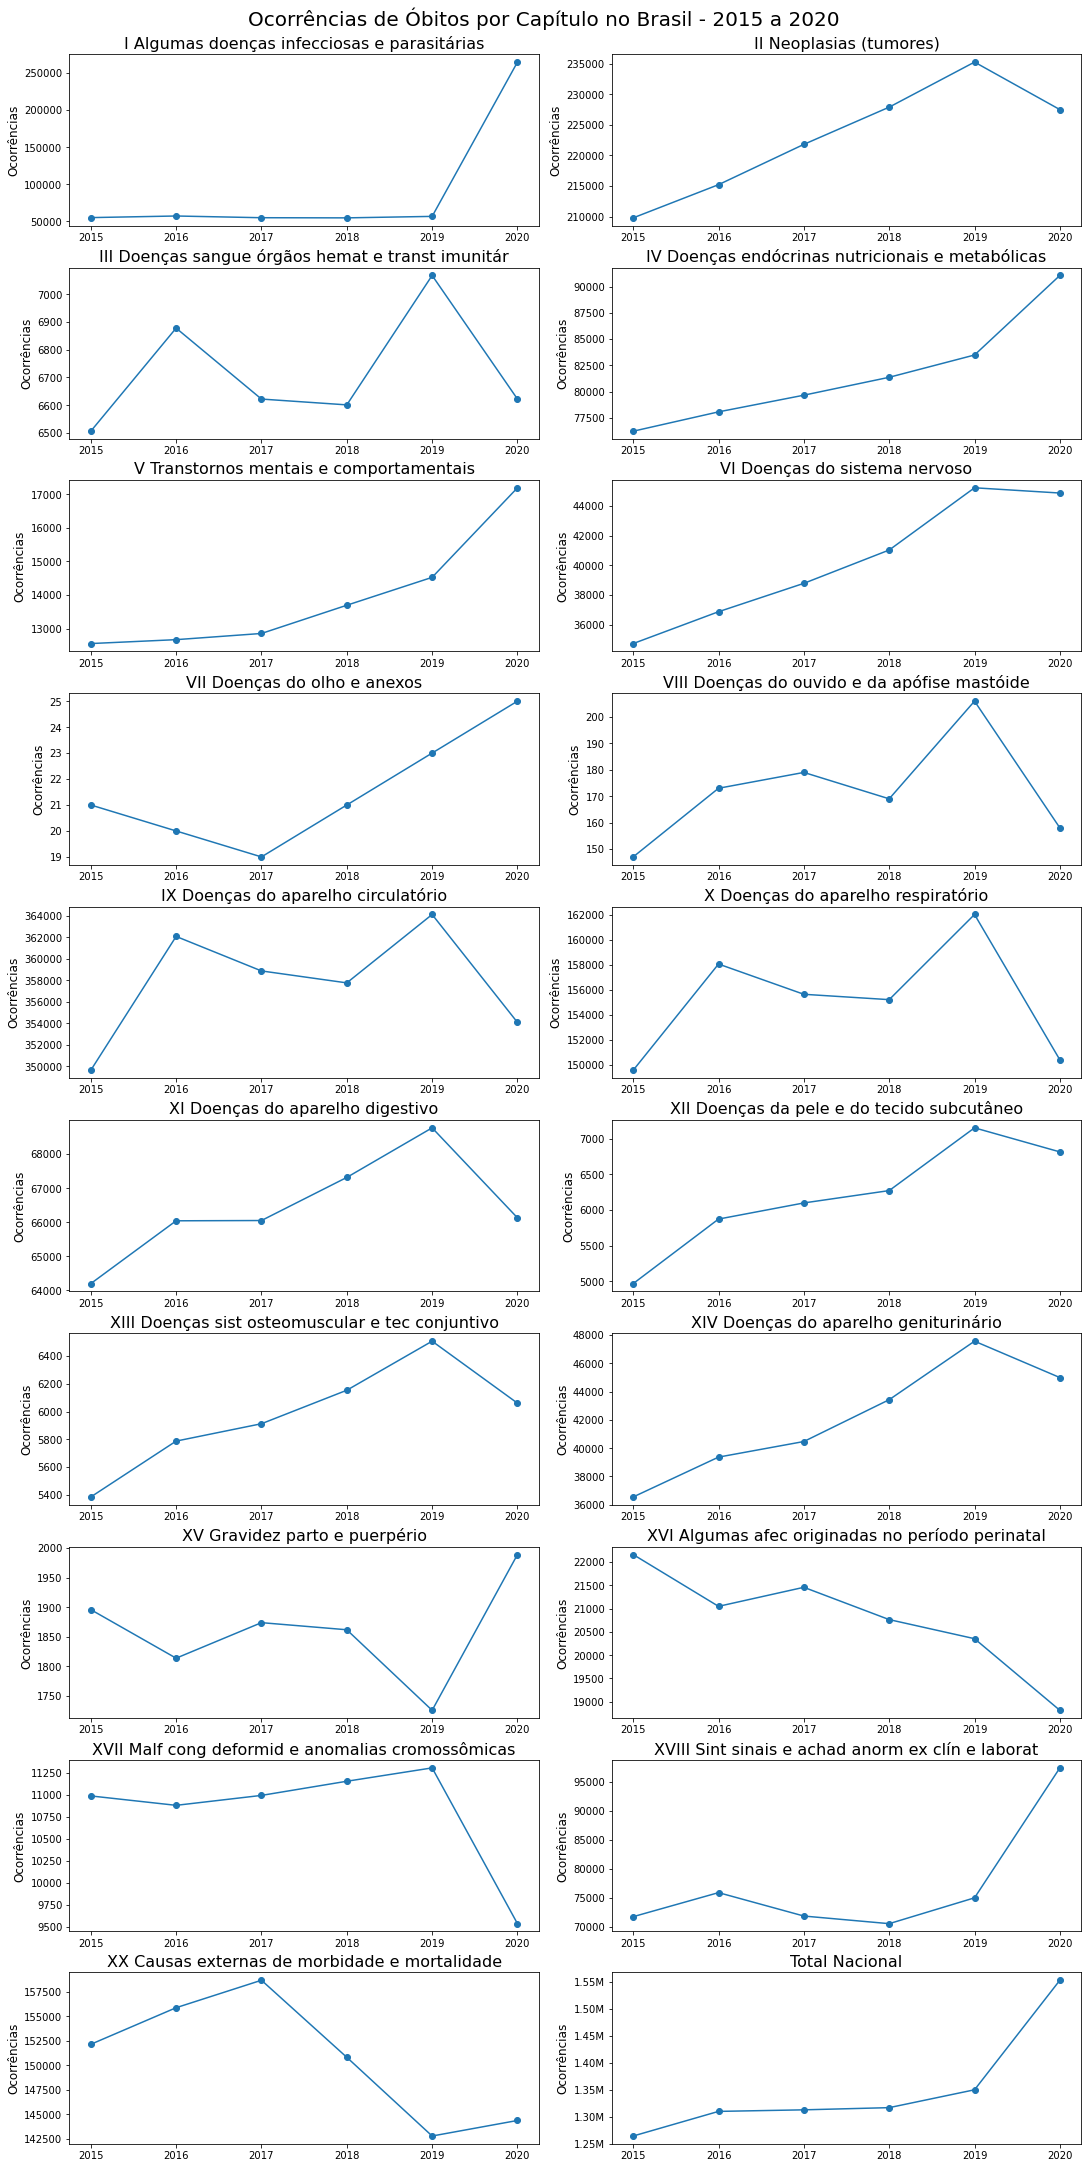

In [11]:
# Montagem dos gráficos de linha: Ocorrências por ano para cada causa de óbito
fig, axs = plt.subplots(nrows=10, ncols=2, constrained_layout=True)
idx1 = 0
idx2 = 0
for index, valores in obitos.iterrows():
    axs[idx1, idx2].plot(anos, valores, marker='o')
    axs[idx1, idx2].set_ylabel('Ocorrências', {'fontsize': 12})
    axs[idx1, idx2].set_title(index + ' ' + capitulos[index], {'fontsize': 16})
    if(index=='Total'):
        axs[idx1, idx2].yaxis.set_major_formatter(milhoes)
    if(idx2==0):
        idx2=1
    else:
        idx2=0
        idx1+=1
fig.suptitle('Ocorrências de Óbitos por Capítulo no Brasil - 2015 a 2020', fontsize=20)
plt.show()

In [12]:
fig.savefig('graficos_plot.png', dpi = 300, bbox_inches = 'tight')

## Análise dos Gráficos de Linha
### A leitura dos gráficos que se fará a seguir é, possivelmente, a mais simples e aceita pela maioria. Foi dividida em três partes:
### 1) Verificação da evolução até o ano de 2019, período pré-pandemia, agrupando-se as causas da seguinte forma:
#### A) Grupo composto pelas causas que apresentaram crescimento contínuo e constante: Capítulos II, IV, V, VI, XI, XII, XIII e XIV;
#### B) Grupo composto pela única causa que apresentou diminuição constante nas quantidades: Capítulo XVI;
#### C) Grupo com as causas que apresentaram comportamento linear, com pouca ou nenhuma variação: Capítulos I, XVII e XVIII;
#### D) Já as causas que apresentaram comportamentos inesperados, alternando entre aumento e diminuição das quantidades, compõem este último grupo: Capítulos III, VII, VIII, IX, X, XV e XX.
### 2) Para 2020, primeiro ano da pandemia por COVID-19, o comportamento verificado foi assim classificado:
#### E) Causas que tiveram crescimento significativo em suas quantidades: Capítulos I, IV, V, XV e XVIII;
#### F) Causa que diminuiu significativamente sua quantidade: Capítulos XVII;
#### G) Causas que seguiam uma determinada tendência até o ano de 2018, sofreram uma variação abrupta em 2019 e retornaram a tendencia inicial em 2020: Capítulos III, VIII, IX e X;
#### H) Causa que manteve tendência de alta constante: Capítulo VII;
#### I) Causa que manteve tendência de baixa, mas de forma acentuada: Capítulo XVI;
#### J) Causas que vinham com tendência de alta, mas reverteram, diminuindo-a: Capítulos II, VI, XI, XII, XIII e XIV;
#### K) Causa que vinha com tendência de baixa, mas reverteu em leve alta: Capítulo XX.
### 3) Para finalizar, a análise do Total Nacional, onde percebe-se aumento acentuado dos óbitos no ano de 2020, que, comparado a quantidade de 2019, representa um acréscimo de 202938 ocorrências.

## Gráficos de Pizza - Composição Percentual das Causas de Óbitos de 2015 a 2020

In [13]:
plt.rc('figure', figsize = (12,15))

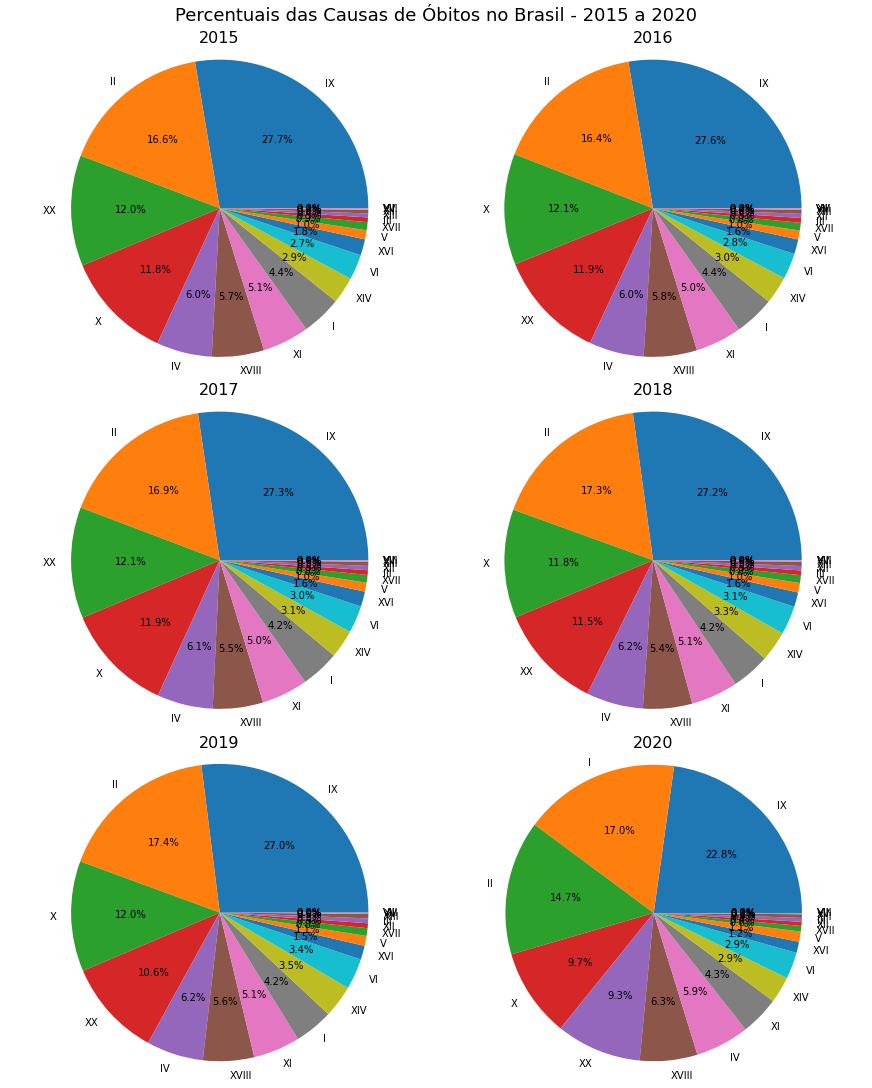

In [14]:
# Montagem de gráficos de pizza: Percentuais das causas de óbitos, de 2015 a 2020
fig, axs = plt.subplots(nrows=3, ncols=2, constrained_layout=True)
idx1 = 0
idx2 = 0
for ano in tuple(obitos.columns):
    dfano = pd.DataFrame(list(obitos[ano].values[:-1]), list(obitos.index[:-1]))
    dfano.sort_values(by=0, ascending=False, inplace=True)
    labels = tuple(dfano.index)
    sizes = list(dfano[0].values)
    axs[idx1, idx2].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
    axs[idx1, idx2].set_title(str(ano), {'fontsize': 16})
    axs[idx1, idx2].axis('equal')
    if(idx2==0):
        idx2=1
    else:
        idx2=0
        idx1+=1
fig.suptitle('Percentuais das Causas de Óbitos no Brasil - 2015 a 2020', fontsize=18)
plt.show()

In [15]:
fig.savefig('graficos_pizza.png', dpi = 300, bbox_inches = 'tight')

## Análise dos Gráficos de Pizza
### Esses gráficos apresentam a participação percentual de cada Capítulo no total de ocorrências, por ano analisado. Para facilitar a visulização e identificação dos Capítulos mais expressivos, as quantidades foram ordenadas de forma decrescente. A interpretação será superficial e focada nas três causas mais expressivas:
#### A) Os dez Capítulos mais representativos são: IX, II, XX, X, IV, XVIII, XI, I, XIV e VI;
#### B) Os nove Capítulos menos representativos são: XVI, V, XVII, XII, III, XIII, XV, VIII e VII:
#### C) Observa-se um aumento expressivo das doenças infecciosas e parasitárias (Cap. I) no ano de 2020, passando da 8ª posição para a 2ª;
#### D) As doenças do aparelho circulatório (Cap. IX) mantiveram-se em primeiro lugar em todo o período analisado, com percentuais próximos a 27% até 2019, caindo para 22,8% em 2020;
#### E) As neoplasias, ou tumores (Cap. II) ficaram em segundo lugar como causas de óbitos até 2019, com percentuais próximos a 17%, caindo para terceira causa em 2020 (14,7%) e cedendo o segundo lugar para doenças infecciosas e parasitárias (Cap. I), com 17% nesse ano;
#### F) O terceiro lugar, até 2019, foi alternado entre causas externas de morbidade e mortalidade (Cap. XX) e doenças do aparelho respiratório (Cap. X), com percentuais próximos a 12%. Em 2020 o terceiro lugar ficou com o Cap. II, já comentado no item anterior.

## Segunda Carga - Totais de Nascimentos e Óbitos de 2015 a 2020

### Para complementar, nesta segunda carga serão comparados os totais de óbitos com os de nascimentos, também para o período de 2015 a 2020, representando-os num gráfico de barras. Os dados de nascimentos foram coletados do site do DATASUS seguindo o seguinte critério:
#### ==> Estatísticas Vitais > Nascidos vivos - desde 1994 > Nascidos Vivos > Brasil por Região e Unidade da Federação > Linha (Ano do nascimento) / Coluna (não ativa) / Conteúdo (Nascim p/ocorrênc) / Período (2015 a 2019)
#### ==> Estatísticas Vitais > Dados Preliminares de 2020 > Nascidos Vivos > Brasil por Região e Unidade da Federação > Linha (Ano do nascimento) / Coluna (não ativa) / Conteúdo (Nascim p/ocorrênc) / Período (2020)

In [16]:
# Arquivo contendo quantidades de nascimentos por ano
nascimentos = pd.read_csv('Nascimentos-2015-2020.csv', sep = ';', index_col=0)
nascimentos

,Nascim p/ocorrênc
Ano do nascimento,
2015,3017668
2016,2857800
2017,2923535
2018,2944932
2019,2849146
2020,2726025


In [17]:
nascimentos = nascimentos.T
nascimentos

Ano do nascimento,2015,2016,2017,2018,2019,2020
Nascim p/ocorrênc,3017668,2857800,2923535,2944932,2849146,2726025


In [18]:
total_nasc = []
for i in nascimentos.values.tolist()[0]:
    total_nasc.append(i)

In [19]:
total_obt = list(obitos.values[len(obitos)-1])

In [20]:
anos = list(nascimentos.columns)

## Gráfico de Barra - Nascimentos X Óbitos de 2015 a 2020

In [21]:
plt.rc('figure', figsize = (10,6))

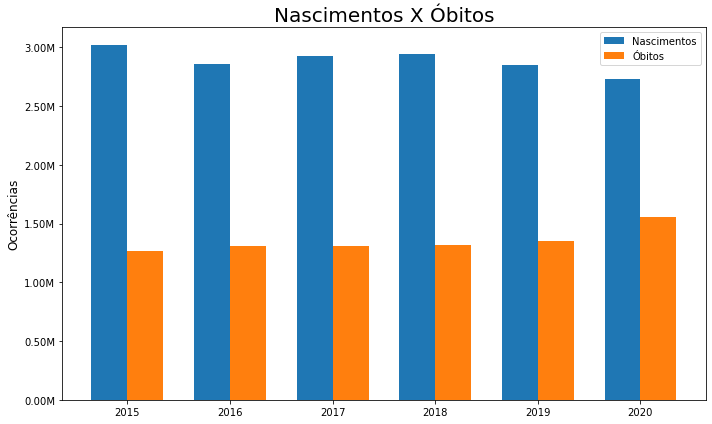

In [22]:
# Montagem do gráfico de barras: Ocorrências de nascimentos X óbitos por ano
x = np.arange(len(anos))
width = 0.35
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(milhoes)
rects1 = ax.bar(x - width/2, total_nasc, width, label='Nascimentos')
rects2 = ax.bar(x + width/2, total_obt, width, label='Óbitos')
ax.set_ylabel('Ocorrências', {'fontsize': 12})
ax.set_title('Nascimentos X Óbitos', {'fontsize': 20})
ax.set_xticks(x, anos)
ax.legend()
fig.tight_layout()
plt.show()

In [23]:
fig.savefig('grafico_bar.png', dpi = 300, bbox_inches = 'tight')

## Análise do Gráfico de Barras
### Nesse gráfico, pode-se fazer a seguinte leitura dos dados apresentados:
#### A) Havia uma pequena oscilação na quantidade de nascimentos até 2019, que foi interrompida em 2020, com uma leve queda;
#### B) A quantidade de óbitos até 2019 se apresentava estável com leve tendência de alta, mas foi acentuada em 2020.

# Finalização

#### Desenvolvi este projeto para testar meus conhecimentos em Python e, principalmente, para ser um primeiro desafio pessoal em minha jornada à ciência de dados.
#### À você que chegou até aqui, meu muito obrigado. Caso tenha algo a me dizer e acredite que sou merecedor de algum tipo de feedback, por favor me escreva. Desde já agradeço qualquer tipo de sugestão que me direcione a aprender mais e melhor.
#### cesar_tomm@yahoo.com.br
#### czar.df.69@gmail.com